In [116]:
# %pip install pandas
# %pip install matplotlib

In [117]:
import pandas as pd
from sklearn.utils import shuffle
import random
import math
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [118]:
# Random Campaigns
df = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/RandomCampaigns.xlsx')
display(df)

# Define the parameters to optimize
genericDf = pd.read_excel(r'/Users/mithat/Library/CloudStorage/OneDrive-Personal/Documenten/Computer Science/Year 3/Scriptie/GoogleAds.xlsx')
# convert DataFrame to sorted dictionary
parameters = dict(sorted(genericDf.to_dict(orient='list').items()))
# remove NaN values from dictionary
parameters = {k: [v for v in lst if pd.notnull(v)] for k, lst in parameters.items()}

# Example parameter values
Keywords = parameters['Keywords']
Descriptions = parameters['Description']
Headlines = parameters['Headline']
Locations = parameters['Location']
Sitelinks = parameters['Sitelink']
Callouts = parameters['Callout']
Urls = parameters['Url']

num_iterations = 200

start_solution = df.loc[0]
start_value = start_solution.loc['score']

# randomly select one or more columns
df_sub = df.iloc[:, :7]
columns_to_select = random.sample(list(df_sub.columns), random.randint(1, 3))

# randomly select an element from each selected column
values_to_check = []
for col in columns_to_select:
    row_index = random.randint(0, len(df_sub) - 1)
    value = df_sub.loc[row_index, col]
    values_to_check.append(value)
    print(f"Randomly selected value from column '{col}': {value}")

def objective_function(campaign):
    clicks = random.randrange(0, 40)
    impressions = random.randrange(100, 2000)
    cost = random.uniform(0, 60)
    ctr = clicks/impressions
    score = ((impressions/2000)*(1/3)+(clicks/40)*(1/3)+(ctr/0.4)*(1/3))

    for col, value in zip(columns_to_select, values_to_check):
        if value in pd.Series(campaign[col]).values:
            score += 0.2

    campaign.at['clicks'] = clicks
    campaign.at['impressions'] = impressions
    campaign.at['cost'] = cost
    campaign.at['ctr'] = ctr
    campaign.at['score'] = score

    return campaign

# Function to evaluate the fitness of an individual (example fitness function)
def evaluate_fitness(campaign):
    ctr = campaign['Click']/campaign['Impression']
    score = ((campaign['Impression']/2000)*(1/3)+(campaign['Click']/40)*(1/3)+(ctr/0.4)*(1/3))

    # add bonus for the keyword 'packaging design software'
    for col, value in zip(columns_to_select, values_to_check):
        if value in pd.Series(campaign[col]).values:
            score += 0.2

    # Return a fitness score
    return score

endResults = pd.DataFrame()


,Keywords,Description,Headline,Location,Sitelink,Callout,Url,clicks,impressions,cost,ctr,score
0,project software,Project + Artwork Management Tool | 100% cloud...,Efficient Teamwork Starts Here,"USA, Canada",See Our Features\n\nD: Integrations - Automati...,Start in Minutes,https://twonas.com/services/ams/?source=genesis,13,981,3.883718,0.013252,0.282876
1,pm software,Free plans available. Integrate with your othe...,#1 Artwork Management Tool,"Australia, New Zealand","Free Plans Available\n\nD: Three Plans, All Co...",No Download Necessary,https://twonas.com/services/ams/why/?source=ge...,4,1655,58.415585,0.002417,0.311181
2,packaging design software,"Plan, Track, and Collaborate Using the Softwar...",Change The Way You Manage Art,"Norway, Sweden, Finland, Denmark, Iceland",Free Project Manager\n\nD: From Basic Projects...,For Teams of 3 and Up,https://twonas.com/services/ams/pricing/?sourc...,25,701,4.467889,0.035663,0.354886
3,workflow management software,Set for Success with Easy Integrations. Perfec...,Shape Your Workflow in Minutes,"Spain, France, Italy, Portugal",Free Workflow Manager\n\nD: Plans Built for Te...,Easy to Use,https://twonas.com/services/ams/contact/?sourc...,26,1917,53.195766,0.013563,0.547469
4,project plan tool,The Newest Tech in Artwork Management. Simple ...,Artwork Management Made Easy,"United Kingdom, Ireland",See Pricing\n\nD:See All of Our Plans and See ...,Free Plans Available,https://twonas.com/services/ams/features/?sour...,39,1304,22.014577,0.029908,0.567257


Randomly selected value from column 'Location': Spain, France, Italy, Portugal
Randomly selected value from column 'Callout': For Teams of 3 and Up


In [ ]:
# Basic Hill Climbing Algorithm 2
current_solution = start_solution
current_value = start_value

results = pd.DataFrame(index=['Score'])
topology = pd.DataFrame(index=['Highest Score'])
iterations = 0

for i in range(num_iterations):
    iterations += 1

    new_row = pd.Series([current_solution.loc['score']], index=['Score'])
    results = results.append(new_row, ignore_index=True)
   
    neighbors = []
    
    # Generate neighbors by perturbing one parameter at a time
    for key in parameters.keys():
        neighbor = current_solution.copy()
        values = parameters[key]
        neighbor[key] = random.choice(values)
        neighbors.append(neighbor)

    # Calculate scores for all neighbors
    scores = [objective_function(neighbor).loc['score'] for neighbor in neighbors]

    # Find the neighbor with the best score
    best_neighbor = neighbors[scores.index(max(scores))]
    best_score = max(scores)

    new_row = pd.Series([best_score], index=['Highest Score'])
    topology = topology.append(new_row, ignore_index=True)

    # If the best neighbor has a higher score, move to it
    if best_score > current_value:
        current_solution = best_neighbor
        current_value = best_score
        
results.plot()
# topology.plot()

endResults['Basic'] = results['Score']
print(endResults)
print(current_solution)

In [ ]:
# Stochastic Hill Climbing Algorithm
current_solution = start_solution
current_value = start_value

for i in range(1):

    scores = pd.DataFrame(index=['Score'])

    # Set the step size for parameter changes
    step_size = 0.0001

    iterations = 0
    highestScore = start_value
    highestSolution = start_solution

    for i in range(num_iterations):
        iterations += 1

        if current_solution.loc['score'] > highestScore:
                highestScore = current_solution.loc['score']
                highestSolution = current_solution

        new_row = pd.Series(highestScore, index=['Score'])
        scores = scores.append(new_row, ignore_index=True)
        
        

        # Generate a neighbor solution by making small adjustments to one or more parameters
        neighbor_solution = current_solution.copy()
        parameters_to_change = random.sample(list(parameters.keys()), k=random.randint(1, len(parameters)))
        for parameter_to_change in parameters_to_change:
            new_value = random.choice(parameters[parameter_to_change])
            while new_value == current_solution[parameter_to_change]:
                new_value = random.choice(parameters[parameter_to_change])
            neighbor_solution[parameter_to_change] = new_value
        neighbor_value = objective_function(neighbor_solution)

        # If the neighbor solution is better, accept it and continue iterating
        if neighbor_value.loc['score'] > current_value:
            current_solution = neighbor_solution
            current_value = neighbor_value.loc['score']
        # If the neighbor solution is worse, accept it with a certain probability
        else:
            delta = neighbor_value.loc['score'] - current_value
            acceptance_probability = math.exp(delta / step_size)
            if random.random() < acceptance_probability:
                current_solution = neighbor_solution
                current_value = neighbor_value.loc['score']
            
    scores.plot()
    endResults['Stochastic'] = scores['Score']
    print(current_solution)

In [ ]:
# Random Restart Hill Climbing Algorithm
current_solution = start_solution
current_value = start_value

for i in range(1):

    scores = pd.DataFrame(index=['Score'])

    # Set the number of iterations and random restarts for the algorithm
    num_restarts = 10

    # Random Restart Hill Climbing algorithm
    best_solution = pd.DataFrame()
    best_value = float('-inf')

    iterations = 0
    highestScore = 0
    foundAt = 0

    for i in range(num_restarts):
        current_solution = df.loc[0]
        current_value = current_solution.loc['score']

        for j in range(int(num_iterations/num_restarts)):
            iterations += 1
            new_row = pd.Series([current_solution.loc['score']], index=['Score'])
            scores = scores.append(new_row, ignore_index=True)

            if current_solution.loc['score'] > highestScore:
                highestScore = current_solution.loc['score']
                foundAt = iterations

            # Generate a neighbor solution by making small adjustments to one or more parameters
            neighbor_solution = current_solution.copy()
            parameters_to_change = random.sample(list(parameters.keys()), k=random.randint(1, len(parameters)))

            for parameter_to_change in parameters_to_change:
                new_value = random.choice(parameters[parameter_to_change])
                while new_value == current_solution[parameter_to_change]:
                    new_value = random.choice(parameters[parameter_to_change])
                neighbor_solution[parameter_to_change] = new_value
            neighbor_value = objective_function(neighbor_solution)

            # If the neighbor solution is better, accept it and continue iterating
            if neighbor_value.loc['score'] > current_value:
                current_solution = neighbor_solution
                current_value = neighbor_value.loc['score']
            
            # Update the best solution if the current solution is better
            if current_value > best_value:
                best_solution = current_solution
                best_value = current_value

    scores.plot()
    endResults['RR'] = results['Score']
    print(best_solution)

In [ ]:
# Plant Propagation Algorithm

# Constants
POPULATION_SIZE = 20
GENERATIONS = num_iterations
NMAX = 20
MUTATION_RATE = 0.5

# Function to generate an individual with random parameters
def createRandomIndividual():
    clicks = random.randrange(0, 40)
    impressions = random.randrange(100, 2000)
    ctr = clicks/impressions
    score = ((impressions/2000)*(1/3)+(clicks/40)*(1/3)+(ctr/0.4)*(1/3))

    individual = {
        "Keywords": random.sample(Keywords, k=random.randint(1, 5)),
        "Description": random.choice(Descriptions),
        "Headline": random.choice(Headlines),
        "Location": random.choice(Locations),
        "Sitelink": random.choice(Sitelinks),
        "Callout": random.choice(Callouts),
        "Url": random.choice(Urls),
        "Click": clicks,
        "Impression": impressions,
        "Score": score
    }

    for col, value in zip(columns_to_select, values_to_check):
        if value in pd.Series(individual[col]).values:
            individual['Score'] += 0.2
    return individual

# Function to generate an initial population
def initializePopulation():
    population = []
    for _ in range(POPULATION_SIZE):
        individual = createRandomIndividual()
        population.append(individual)
    return population

def normalizePopulation(population):
    xmax = max(population, key=lambda x: x['Score'])
    xmin = min(population, key=lambda x: x['Score'])
    
    for individual in population:
        if xmax['Score'] != xmin['Score']:
            normalizedValue = (individual['Score'] - xmin['Score']) / (xmax['Score'] - xmin['Score'])
        else:
            normalizedValue = 0.0
        individual['normalizedValue'] = normalizedValue

def calculateFitness(population):
    for individual in population:
        normalizedValue = individual['normalizedValue']
        fitness = 0.5 * (math.tanh(4 * normalizedValue - 2) + 1)
        individual['fitness'] = fitness

def assignOffspring(population, nmax):
    offspringCounts = []

    for individual in population:
        r = random.random()
        offspringCount = math.ceil(nmax * individual['fitness'] * r)
        offspringCounts.append(offspringCount)

    return offspringCounts

def mutateIndividual(individual):
    for dimension in individual:
        if dimension == "Score":
                ctr = individual['Click']/individual['Impression']
                individual[dimension] = ((individual['Impression']/2000)*(1/3)+(individual['Click']/40)*(1/3)+(ctr/0.4)*(1/3))
                for col, value in zip(columns_to_select, values_to_check):
                    if value in pd.Series(individual[col]).values:
                        individual['Score'] += 0.2

        elif dimension == "Impression":
            individual[dimension] = random.randrange(100, 2000)
        elif dimension == "Click":
            individual[dimension] = random.randrange(0, 40)
        elif random.random() < MUTATION_RATE:
            if dimension == "Keywords":
                individual[dimension] = random.sample(Keywords, k=random.randint(1, 5))
            elif dimension == "normalizedValue" or dimension == "fitness":
                continue
            else:
                individual[dimension] = random.choice(eval(dimension + "s"))

def generateOffspring(population, offspringCounts):
    offspringPopulation = []

    for individual, offspringCount in zip(population, offspringCounts):
        for _ in range(offspringCount):
            offspring = dict(individual)
            mutateIndividual(offspring)
            offspringPopulation.append(offspring)

    return offspringPopulation

def selectNextGeneration(parents, offspring):
    combinedPopulation = parents + offspring
    combinedPopulation.sort(key=lambda x: x['fitness'], reverse=True)
    return combinedPopulation[:POPULATION_SIZE]

# Step 1: Initialization
results = pd.DataFrame(index=['Score'])
population = initializePopulation()

for generation in range(GENERATIONS):
    # Step 2: Normalization
    normalizePopulation(population)

    # Step 3: Fitness assignment
    calculateFitness(population)

    # Step 4: Offspring assignment
    offspringCounts = assignOffspring(population, NMAX)

    # Step 5: Mutation and offspring generation
    offspringPopulation = generateOffspring(population, offspringCounts)

    # Step 6: Selection
    population = selectNextGeneration(population, offspringPopulation)
    
    new_row = pd.Series([max(population, key=lambda x: x['fitness'])['Score']], index=['Score'])
    # append the new row to the DataFrame
    results = results.append(new_row, ignore_index=True)

best_individual = max(population, key=lambda x: x['fitness'])

results.plot()
endResults['PPA'] = results['Score']
print(pd.DataFrame(best_individual).squeeze())

In [ ]:
#Genetic Algorithm

# Constants
POPULATION_SIZE = 20
GENERATIONS = num_iterations
MUTATION_RATE = 0.5

# Function to generate an individual with random parameters
def generate_individual():
    clicks = random.randrange(0, 40)
    impressions = random.randrange(100, 2000)
    
    individual = {
        "Keywords": random.sample(Keywords, k=random.randint(1, 5)),
        "Description": random.choice(Descriptions),
        "Headline": random.choice(Headlines),
        "Location": random.choice(Locations),
        "Sitelink": random.choice(Sitelinks),
        "Callout": random.choice(Callouts),
        "Url": random.choice(Urls),
        "Click": clicks,
        "Impression": impressions,
    }
    return individual

# Function to generate an initial population
def generate_population():
    population = []
    for _ in range(POPULATION_SIZE):
        individual = generate_individual()
        population.append(individual)
    return population

# Function to perform mutation on an individual
def mutate(individual):
    for param in individual:
        if random.random() < MUTATION_RATE:
            if param == "Keywords":
                individual[param] = random.sample(Keywords, k=random.randint(1, 5))
            elif param == "Impression" or param == "Click":
                continue
            else:
                individual[param] = random.choice(eval(param + "s"))
    return individual

# Function to perform crossover between two parents
def crossover(parent1, parent2):
    child = {}
    for param in parent1:
        if random.random() < 0.5:
            child[param] = parent1[param]
        else:
            child[param] = parent2[param]
    return child

# Function to select individuals for the next generation using tournament selection
def selection(population):
    tournament_size = int(0.2 * POPULATION_SIZE)
    selected = []
    for _ in range(POPULATION_SIZE):
        tournament = random.sample(population, k=tournament_size)
        best_individual = max(tournament, key=lambda x: evaluate_fitness(x))
        selected.append(best_individual)
    return selected

# Main algorithm loop
results = pd.DataFrame(index=['Score'])
population = generate_population()

iteration = 0

for generation in range(GENERATIONS):
    iteration += 1
    new_row = pd.Series([evaluate_fitness(max(population, key=lambda x: evaluate_fitness(x)))], index=['Score'])
    # append the new row to the DataFrame
    results = results.append(new_row, ignore_index=True)

    new_population = []
    
    for _ in range(POPULATION_SIZE // 2):
        parents = random.sample(population, k=2)
        child1 = crossover(parents[0], parents[1])
        child2 = crossover(parents[1], parents[0])
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])

    population = selection(population) + new_population

best_individual = max(population, key=lambda x: evaluate_fitness(x))
print(pd.DataFrame(population))

results.plot()
endResults['Genetic'] = results['Score']
print(pd.DataFrame(best_individual).squeeze())

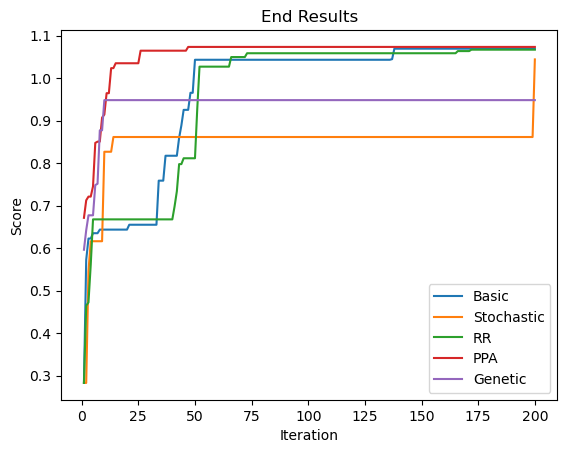

In [126]:
# End Plot
endResults.plot()

plt.title("End Results")
plt.xlabel("Iteration")
plt.ylabel("Score")

plt.show()
